<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_8_MLP_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [26]:
data.shape

(506, 13)

In [27]:
target.shape

(506,)

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state=1)

In [35]:
regr = MLPRegressor(random_state=1, max_iter=1500, verbose=True, activation = 'relu', solver = 'adam').fit(X_train, y_train)

Iteration 1, loss = 949.34709197
Iteration 2, loss = 429.97817914
Iteration 3, loss = 209.12780984
Iteration 4, loss = 196.06894281
Iteration 5, loss = 230.98998797
Iteration 6, loss = 222.74934074
Iteration 7, loss = 164.01063331
Iteration 8, loss = 92.69774288
Iteration 9, loss = 48.34590551
Iteration 10, loss = 38.91973242
Iteration 11, loss = 53.49383791
Iteration 12, loss = 66.19313121
Iteration 13, loss = 65.25256473
Iteration 14, loss = 53.99686245
Iteration 15, loss = 41.86547745
Iteration 16, loss = 39.27990067
Iteration 17, loss = 42.35583551
Iteration 18, loss = 46.12654714
Iteration 19, loss = 44.62935850
Iteration 20, loss = 38.61495036
Iteration 21, loss = 33.46540417
Iteration 22, loss = 30.93590485
Iteration 23, loss = 31.39529288
Iteration 24, loss = 32.29749254
Iteration 25, loss = 31.71043669
Iteration 26, loss = 30.13437558
Iteration 27, loss = 28.83779518
Iteration 28, loss = 28.91413391
Iteration 29, loss = 29.35882461
Iteration 30, loss = 29.40021043
Iteration 31

In [36]:
y_pred = regr.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
0,28.2,33.714994
1,23.9,28.211548
2,16.6,22.103730
3,22.0,24.307633
4,20.8,27.952484


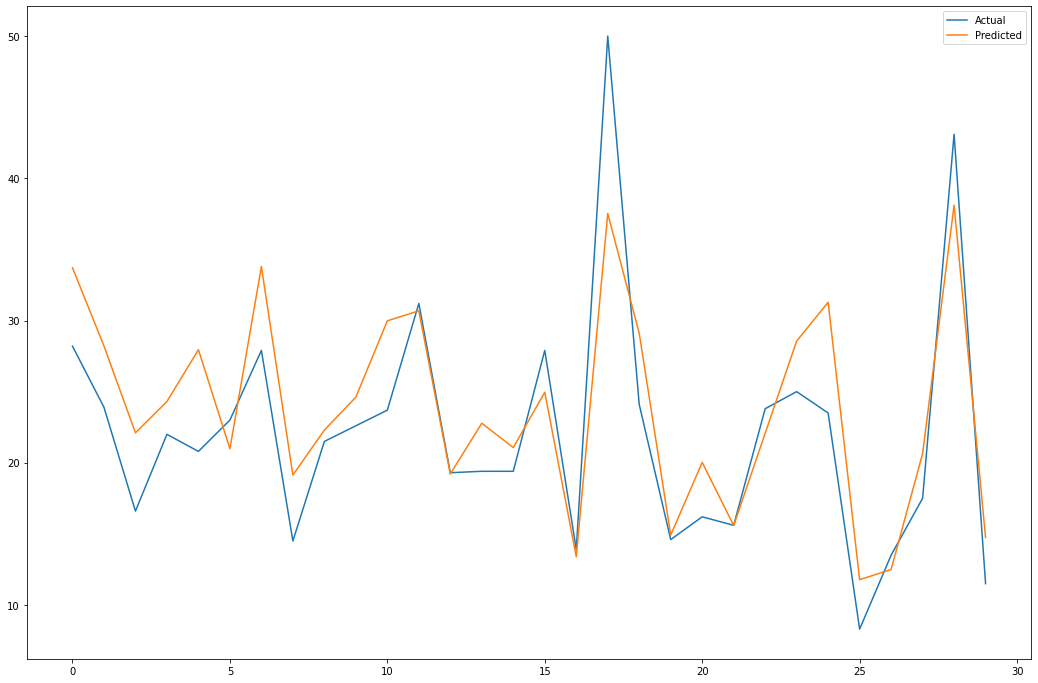

In [50]:
import matplotlib.pyplot as plt
df_temp = df_temp.head(30)
df_temp.plot(kind='line',figsize=(18,12))
plt.show()

In [51]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.2361323094674703
MSE: 18.866813625399114
RMSE: 4.343594551221271


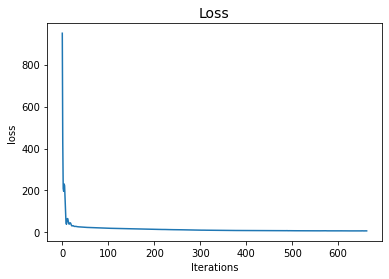

In [52]:
plt.plot(regr.loss_curve_)
plt.title("Loss", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()